# Introduction

On a warm summers day nothing compares to a cold pint in good company, but on a cold, damp and rainy day the last thought on anyones mind is of heading to the pub. The relationship between the consumption of beer and weather is an obvious one but just how much does the weather affect our cravings for this most splendid of beverages?

<img src="assets/beer.jpg" width="600">

The [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) we'll be working with comes from Kaggle and contains values for beer consumption along with various weather statistics for 365 days in the area of São Paulo, Brazil. Let's **hop** into looking at how we can use linear regression to model this relationship.

# Packages and settings

In [1]:
# For plotting data
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Patch

# For importing tabulated data
import pandas as pd

# For representing and operating on vectors and matracies
import numpy as np

# Set the graph image to display as a support vector graphic
%config InlineBackend.figure_format = 'svg'

# Prevent pandas dataframe preview from taking up too much vertical space
pd.options.display.max_rows = 7

# Simple linear regression

With simple linear regression we aim to predict a dependent variable, $y$, given a single independent variable, $x$, by uncovering a linear relationship between the two. To demonstrate this process we'll investigate the relationship between the **volume of beer consumed**, $y$, over the course of a given day and the **average temperature**, $x$, for that very same day.

Our data comes in the form of $m$ pairs of observations of $x$ and $y$.  Both $x$ and $y$ are represented by seperate column vectors whose elements can be paired together using single subscript notation to produce observations of the form ($x_{i}$, $y_{i}$).

$$
\begin{align*}
&
\vec{x} = \begin{bmatrix}
    x_{i}
\end{bmatrix} =
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    \vdots \\ 
    x_{m}
\end{bmatrix}
&
\vec{y} = 
\begin{bmatrix}
    y_{i}
\end{bmatrix} =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\ 
    y_{m}
\end{bmatrix}
\end{align*}
$$

To solidify this representation further let's import and display our data using the python package, pandas.

In [2]:
# Read in our dataset
df = pd.read_csv('beer.csv')
# Select a subset of the columns of our data
df = df[['avg_temp(c)', 'beer_consumption(l)']]
# Display our data
df

,avg_temp(c),beer_consumption(l)
0,27.30,25.461
1,27.02,28.972
2,24.82,30.814
...,...,...
362,21.68,22.309
363,21.38,20.467
364,24.76,22.446


# Visualisation

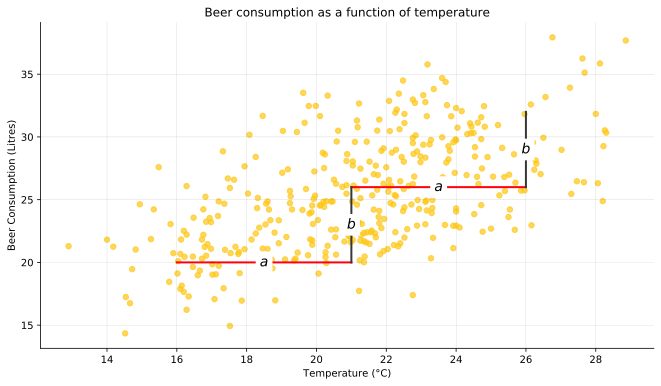

In [3]:
# Assign avgerage temperature to x and shape it into a column vector
x = df[['avg_temp(c)']].values.reshape(-1, 1)
# Assign beer consumption to y and shape it into a column vector
y = df[['beer_consumption(l)']].values.reshape(-1, 1)

# Configure the graph display size
fig, ax = plt.subplots(figsize=(11, 6))

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
# Add title and axes labels
ax.set_title('Beer consumption as a function of temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Beer Consumption (Litres)')

# Plot observations of x and y on our graph
ax.scatter(x, y, alpha=0.70, color='xkcd:golden yellow', s=30)

# Plot lines and text for a
ax.plot([16, 21], [20, 20], color='xkcd:bright red', linestyle='-', linewidth=2)
ax.plot([21, 26], [26, 26], color='xkcd:bright red', linestyle='-', linewidth=2)
t = plt.text(18.5, 20, '$a$', horizontalalignment='center', verticalalignment='center', fontsize=14)
t.set_bbox(dict(facecolor='white', edgecolor='none'))
t = plt.text(23.5, 26, '$a$', horizontalalignment='center', verticalalignment='center', fontsize=14)
t.set_bbox(dict(facecolor='white', edgecolor='none'))

# Plot lines and text for b
ax.plot([21, 21], [20, 26], color='xkcd:charcoal', linestyle='-', linewidth=2)
ax.plot([26, 26], [26, 32], color='xkcd:charcoal', linestyle='-', linewidth=2)
t = plt.text(21, 23, '$b$', horizontalalignment='center', verticalalignment='center', fontsize=14)
t.set_bbox(dict(facecolor='white', edgecolor='none'))
t = plt.text(26, 29, '$b$', horizontalalignment='center', verticalalignment='center', fontsize=14)
t.set_bbox(dict(facecolor='white', edgecolor='none'))

plt.show()

In the above graph we observe an interesting trend of our data, namely, a **positive**, **linear** correlation between beer consumption and temperature.
- The correlation is **positive** because, on average, **beer consumption increases as temperature increases**.
- The correlation is **linear** because, on average, **a fixed increase in temperature, $a$, produces a fixed increase in beer consumption, $b$**.

This linear relationship of our data is exactly what we aim to model with simple linear regression.

# A hypothesis for our data

We model the linear relationship between $\vec{x}$ and $\vec{y}$ using a mapping function, $h\colon \vec{x} \to \vec{y}$, which is known as the hypothesis function and comes in the form $h(x; \theta_i) = \theta_0 + \theta_1\vec{x}$. 

- $h(x; \theta_i)$ is our **prediction** of $y$ given the variable $x$ and parameters $\theta_i$.
- $\theta_0$ corresponds to the **y-intercept** of a line that fits the data.
- $\theta_1$ corresponds to **the rate of change of $y$ with respect to $x$**, or the gradient of a line that fits the data.

$h(x; \theta_i)$ refers to a function $h$ that takes a variable, $x$, and parameters $\theta_i$ as intput. The difference between a variable and a parameter, is a semantic one in that each of the parameters $\theta_i$ takes on a fixed, although currently unknown value, while the variable, $x$, will take on many different values from our dataset.

As both $x$ and $y$ are represented by column vectors we can compute $h(x)$ via scalar multiplication and addition as follows.

$$
\begin{align*}
h(x) = \theta_0 + \theta_1\vec{x}
= \theta_0 + \theta_1
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    \vdots \\ 
    x_{m}
\end{bmatrix}
= \theta_0 +
\begin{bmatrix}
    \theta_0x_{1} \\
    \theta_0x_{2} \\
    \vdots \\ 
    \theta_0x_{m}
\end{bmatrix}
= 
\begin{bmatrix}
    \theta_0 + \theta_0x_{1} \\
    \theta_0 + \theta_0x_{2} \\
    \vdots \\ 
    \theta_0 + \theta_0x_{m}
\end{bmatrix}
\end{align*}
$$

Using some sensible values for $\theta_i$ let us now compute our prediction of beer consumption for each temperature in our dataset, $h(x_i)$, and plot this against the actual value for beer consumption in our dataset, $y_i$, for comparison.

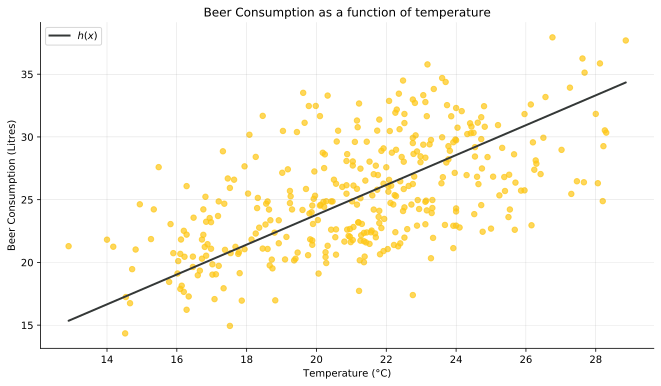

In [4]:
# Assign avgerage temperature to x
x = df[['avg_temp(c)']].values

# Assign beer consumption to y
y = df[['beer_consumption(l)']].values

# Assign some guesses of theta_0, the y-intercept and theta_1, the gradient
theta = np.array([
    [0], 
    [1.19]
])

# Compute h(x) via scalar multiplication
h = theta[0] + thet[1] * x

# Configure the graph display size
fig, ax = plt.subplots(figsize=(11, 6))

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Add title and axes labels
ax.set_title('Beer Consumption as a function of temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Beer Consumption (Litres)')

# Plot pairs of x and y on our graph
ax.scatter(x, y, alpha=0.70, color='xkcd:golden yellow', s=30)

# Plot h(x)
ax.plot(x, h, 'xkcd:charcoal', label='$h(x)$', linewidth=2)

# Add a legend to the graph
ax.legend()

# Display the graph
plt.show()


# Computing the hypothesis function via matrix multiplication

We just learned how we can compute $h(x)$ via scalar multiplication and addition, $h(x) = \theta_0 + \theta_1\vec{x}$, but there exists another method of computing $h(x)$ that is both more compact and more efficient, $h(x) = X\theta$.

To derive $h(x) = X\theta$ from $h(x) = \theta_0 + \vec{x}\theta_1$ we:
- Add a new column, $x_0$, to $x$ to produce the matrix $X$.

$
\begin{align*}
&&
\vec{x_{0}} =
\begin{bmatrix}
    1 \\
    1 \\
    \vdots \\ 
    1
\end{bmatrix}
&&
X =
\begin{bmatrix}
    1      & x_{1} \\
    1      & x_{2} \\
    \vdots      & \vdots \\ 
    1      & x_{m}
\end{bmatrix}
&&
\vec{\theta} =
\begin{bmatrix}
    \theta_0 \\
    \theta_1
\end{bmatrix}
\end{align*}
$

- Rewrite $h(x)$ as a linear combination.

$
\begin{align*}
&&
h(x) \;=\; \theta_0 + \theta_1x_1 \;
=\; \theta_0x_0 + \theta_1x_1 \;
\end{align*}
$
- Show that the linear combination $\theta_0x_0 + \theta_1x_1$ is equal to $X\theta$.

$
\begin{align*}
&&
\theta_0x_0 + \theta_1x_1  \;=\;
\theta_{0}
\begin{bmatrix}
    1\\
    1\\
    \vdots \\
    1\\
\end{bmatrix}
+
\theta_{1}
\begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots \\
    x_{m}\\
\end{bmatrix}
\;=\;
\begin{bmatrix}
    \theta_{0} + \theta_{1}x_{1}\\
    \theta_{0} + \theta_{1}x_{2}\\
    \vdots \\
    \theta_{0} + \theta_{1}x_{m}\\
\end{bmatrix}
\;=\;
\begin{bmatrix}
    1      & x_{1} \\
    1      & x_{2} \\
    \vdots      & \vdots \\ 
    1      & x_{m}
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\
    \theta_1
\end{bmatrix}
\;=\;
X\theta
\end{align*}
$

Now let us validate that the result of these two methods are indeed the same by equating them in code.

In [5]:
# Assign avgerage temperature to x
x = df[['avg_temp(c)']].values

# Assign beer consumption to y
y = df[['beer_consumption(l)']].values

# Assign some guesses of theta_0, the y-intercept and theta_1, the gradient
theta = np.array([
    [3],
    [1.1]
])

# Compute h via scalar multiplication
h1 = theta[0] + theta[1] * x

# Add x0 to x
x = np.hstack([np.ones(x.shape), x])
# Comput h via matrix multiplication
h2 = x @ theta

# Verify that each row of h1 is equal to each row of h2
print(np.all(h1 == h2))

True


# Measuring the fit of the hypothesis to our data

As you can see from the preceding graph, our values of $\theta_{0}$ and $\theta_{1}$ produce a mapping that fits our data reasonably well, but we can also see that a different set of values would probably produce a better fit. Moving away from visual inspection, how can we say with certainty which hypothesis best fits our data? The method of least squares regression provides us an answer in the form of a single metric that we can use to compare each of our hypotheses.

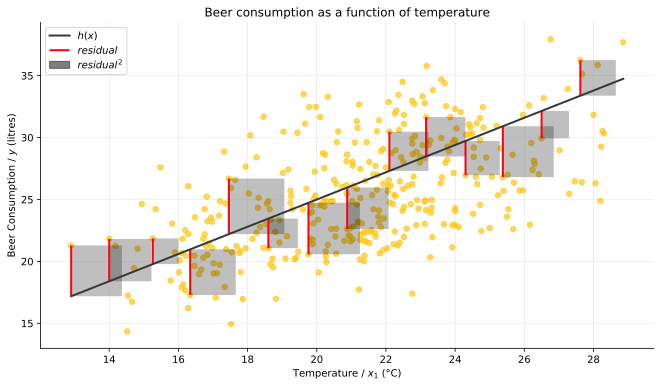

In [6]:
# Assign avgerage temperature to x
x = df[['avg_temp(c)']].values
ind = np.argsort(x.squeeze())
x = x[ind]

# Assign beer consumption to y
y = df[['beer_consumption(l)']].values
y = y[ind]

# Assign some guesses of theta_0, the y-intercept and theta_1, the gradient
theta = np.array([
    [3],
    [1.1]
])

# Compute h(x)
h = theta[0] + theta[1] * x

# Configure the graph display size
fig, ax = plt.subplots(figsize=(11, 6))

# Plot h(x)
ax.plot(x, h, 'xkcd:charcoal', label='$h(x)$', linewidth=2)
# Plot the data points of (x, y) on our graph
ax.scatter(x, y, alpha=0.70, color='xkcd:golden yellow', s=30)

sample = (np.absolute(h - y).squeeze() < 5) & (np.absolute(h - y).squeeze() > 2)
x, y, h = x[sample], y[sample], h[sample]
spacing = np.arange(np.min(x), np.max(x), (np.max(x) - np.min(x)) / 14)
sample = np.argsort(np.absolute(x - spacing), axis=0)[0, :]
# sample = np.array([0, 1, 3, 5, 8, 16, 26, 30, 40, 48, 63, 85, 102, 118, 126, 132, 136, 142, 143, 145])
x, y, h = x[sample], y[sample], h[sample]

# Plot the residuals
ax.add_collection(LineCollection(np.hstack([x, y, x, h]).reshape((-1, 2, 2)), color='xkcd:bright red', linestyles='-', label='$residual$', linewidth=2))
# Create rectangles to represent the square of our residuals
residual2 = [Rectangle((a, b), abs(c - b) / 2.5 * 0.894, c - b) for a, b, c in zip(x, y, h)]
# Plot the rectangles
ax.add_collection(PatchCollection(residual2, color="xkcd:black", edgecolor='none', alpha=0.25, label='${residual}^2$'))

# Add title and axes labels
ax.set_title('Beer consumption as a function of temperature')
ax.set_xlabel('Temperature / $x_1$ (°C)')
ax.set_ylabel('Beer Consumption / $y$ (litres)')
    
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
# Add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Add custom legend to the second subplot that includes a label for the square of our residuals
ax.legend(handles=ax.get_legend_handles_labels()[0] + [Patch(color='xkcd:black', label='${residual}^2$', alpha=0.5)])

# Display the graph
plt.show()

Residuals (also known as the errors of prediction) are defined as the differences between our predictions of $y$ and the observed values of $y$, $h(x) - y$, and are depicted by the red lines in the graph above. We can use the mean average of the residuals as an indicator of how well our hypothesis fits our data; a smaller value implies a better fitting hypothesis.

$$\min_{h(x)} \frac{1}{m}\sum^{m}_{1} h(x) - y$$

You may have noticed that when $h(x)$ is less than $y$ the corresponding residual takes on a negative value. As our residuals represent the error of prediction, a negative error implies a prediction better than the observed value, which is impossible, and could cancel out other errors during summation. For this reason we ensure that all values of $h(x) - y$ are positive by taking their square before summation. The squared residuals can also be visualised in the above graph. $$\min_{h(x)}\frac{1}{m}\sum^{m}_{1} (h(x) - y)^2$$

Thus we have derived the least squares regression cost function, where cost refers to the fact that larger values are inherently bad. The preferential use of $(h(x) - y)^2$ over $|h(x) - y|$ to fix the sign of the residuals may at first look like an overcomplication but does infact reward us in several ways, the most important of which, is that the derivative of $(h(x) - y)^2$ is continuous while the derivative of  $|h(x) - y|$ is not. The significance of this fact may not manifest immediately but will later become clear when we discuss the topic of gradient descent as a method of finding optimal model parameters in a subsequent notebook.

# Finding the best fitting hypothesis for our data

There are several methods for finding optimal values of $\theta_0$ and $\theta_1$, but two common methods are gradient descent and analytical analysis via normal equations.

The key difference between the two methods lies in their algrithmic complexity. Gradient descent has a complexity of $O(n^2)$ while analytical analysis via normal equation has a complexity of $O(n^3)$, where $n$ is the number of explanatory variables, $x_1, ..., x_n$. This makes gradient descent better suited to problems with many explanatory variables, typically tens of thoundsands.

As we are working with data that contains just one explanatory variable we will look at using the linear algebra library numpy to solve for $\theta_0$ and $\theta_1$.

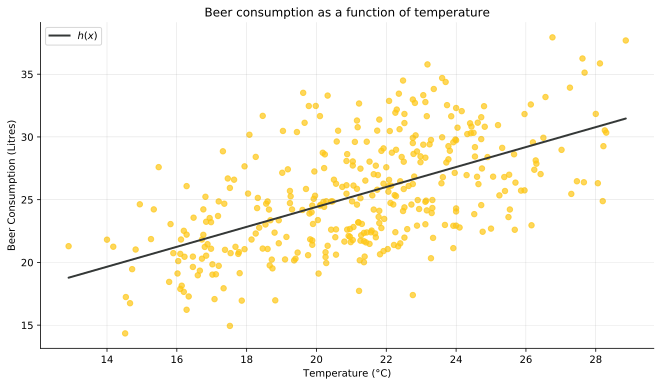

In [7]:
# Assign avgerage temperature to x and reshape it into a column vector
x = df[['avg_temp(c)']].values.reshape(-1, 1)

# Assign beer consumption to y and reshape it into a column vector
y = df[['beer_consumption(l)']].values.reshape(-1, 1)

# Add x0
x = np.hstack([np.ones((len(x), 1)), x])

# Find optimal values of theta0 and theta1 then reshape into a column vector
theta = np.linalg.lstsq(x, y, rcond=None)[0].reshape(-1, 1)

# Compute h
h = x @ theta

# Configure the graph display size
fig, ax = plt.subplots(figsize=(11, 6))

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Add title and axes labels
ax.set_title('Beer consumption as a function of temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Beer Consumption (Litres)')

# Plot pairs of x and y on our graph
ax.scatter(x[:, 1], y, alpha=0.70, color='xkcd:golden yellow', s=30)

# Plot h(x)
ax.plot(x[:, 1], h, 'xkcd:charcoal', label='$h(x)$', linewidth=2)

# Add a legend to the graph
ax.legend()

# Display the graph
plt.show()

# Making a prediction

Let's imagine for a second that we're a pub owner in São Paulo and we are trying to decide if we have enough barrels of beer for an approaching day that has a temperature forecast of **25.32°C**. Using our linear regression model we can make a sensible prediction of beer consumption based on data we've collected over the previous year.

In [8]:
# Assign avgerage temperature to x and reshape it into a column vector
x = df[['avg_temp(c)']].values.reshape(-1, 1)

# Assign beer consumption to y and reshape it into a column vector
y = df[['beer_consumption(l)']].values.reshape(-1, 1)

# Add x0
x = np.hstack([np.ones((len(x), 1)), x])

# Find optimal values of theta0 and theta1 then reshape into a column vector
theta = np.linalg.lstsq(x, y, rcond=None)[0].reshape(-1, 1)

h = np.array([[1, 25.32]]) @ theta

print("Beer consumption prediction for %s°C: %s " % (25.32, h[0][0]))

Beer consumption prediction for 25.32°C: 28.655333120934497 
